<a href="https://colab.research.google.com/github/jthetzel/BloodClinicServer/blob/master/chapter04_getting_started_with_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

## Decode review to text

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
  [reverse_word_index.get(i - 3, "?") for i in train_data[0]]    
)

1654784/1641221 [==============================] - 0s 0us/step


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing data

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10_000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## Build model

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
                          layers.Dense(16, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1, activation="sigmoid")               
])

In [12]:
model.compile(
  optimizer="rmsprop",
  loss="binary_crossentropy",
  metrics=["accuracy"]
)

## Validation

In [14]:
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]
y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

## Train model

In [21]:
history = model.fit(
  partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 1s 41ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4947
Epoch 8/20
30

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

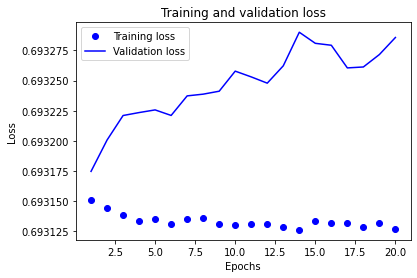

In [19]:
import matplotlib.pyplot as plt

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

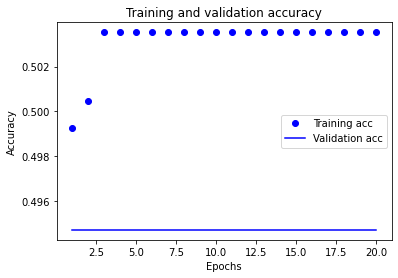

In [20]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Retrain from scratch

In [23]:
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dense(16, activation="relu"),
  layers.Dense(1, activation="sigmoid")
])

model.compile(
  optimizer="rmsprop",
  loss="binary_crossentropy",
  metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 2s 35ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.6932 - accuracy: 0.4939
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.6932 - accuracy: 0.4949
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931484341621399, 0.5]

In [24]:
model.predict(x_test)

array([[0.4919772 ],
       [0.49933136],
       [0.49933136],
       ...,
       [0.49933136],
       [0.49933136],
       [0.49933136]], dtype=float32)

## Reuters data

In [58]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

In [26]:
len(train_data)

8982

In [27]:
len(test_data)

2246

In [28]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## Decode back to text

In [30]:
word_index = reuters.get_word_index()

In [34]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [36]:
train_labels[10]

3

## Prepare data

In [59]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [62]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [63]:
len(x_test)

2246

In [64]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [65]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Build model

In [66]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

In [67]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Validation data

In [68]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Train

In [69]:
history = model.fit(
  partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 84ms/step - loss: 2.5925 - accuracy: 0.5322 - val_loss: 1.7318 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4247 - accuracy: 0.6997 - val_loss: 1.3072 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0581 - accuracy: 0.7672 - val_loss: 1.1317 - val_accuracy: 0.7440
Epoch 4/20
16/16 [==============================] - 1s 57ms/step - loss: 0.8366 - accuracy: 0.8195 - val_loss: 1.0268 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 1s 56ms/step - loss: 0.6602 - accuracy: 0.8619 - val_loss: 0.9708 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.5314 - accuracy: 0.8867 - val_loss: 0.9045 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 63ms/step - loss: 0.4269 - accuracy: 0.9100 - val_loss: 0.8948 - val_accuracy: 0.8050
Epoch 8/20
16

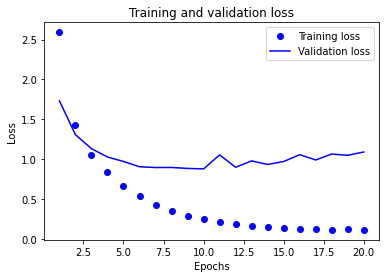

In [70]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

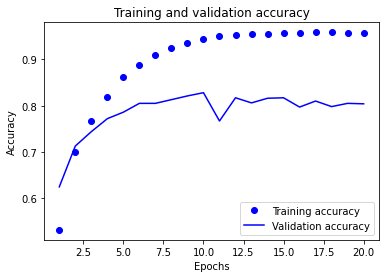

In [71]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [72]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")                
])

model.compile(
  optimizer="rmsprop",
  loss="categorical_crossentropy",
  metrics=["accuracy"]  
)

model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512
)

results = model.evaluate(x_test, y_test)

results

Epoch 1/9
18/18 [==============================] - 2s 58ms/step - loss: 2.4418 - accuracy: 0.5424
Epoch 2/9
18/18 [==============================] - 1s 58ms/step - loss: 1.3165 - accuracy: 0.7173
Epoch 3/9
18/18 [==============================] - 1s 52ms/step - loss: 0.9893 - accuracy: 0.7898
Epoch 4/9
18/18 [==============================] - 1s 47ms/step - loss: 0.7702 - accuracy: 0.8362
Epoch 5/9
18/18 [==============================] - 1s 45ms/step - loss: 0.6086 - accuracy: 0.8716
Epoch 6/9
18/18 [==============================] - 1s 45ms/step - loss: 0.4823 - accuracy: 0.9009
Epoch 7/9
18/18 [==============================] - 1s 47ms/step - loss: 0.3824 - accuracy: 0.9215
Epoch 8/9
18/18 [==============================] - 1s 53ms/step - loss: 0.3157 - accuracy: 0.9315
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9699 - accuracy: 0.7930


[0.9699109196662903, 0.792965292930603]

In [73]:
model.predict(x_test)

array([[2.1080661e-05, 1.8647635e-05, 9.8692335e-06, ..., 1.6372659e-06,
        1.1967247e-06, 1.4851809e-06],
       [2.1691574e-03, 1.3551585e-02, 9.7001367e-04, ..., 3.2708253e-05,
        1.4164816e-05, 9.8667660e-05],
       [2.2678949e-02, 6.3109410e-01, 2.4598215e-03, ..., 2.5705036e-03,
        1.0003210e-03, 4.7725011e-03],
       ...,
       [2.7197384e-05, 4.2438605e-05, 6.9397620e-06, ..., 1.8661289e-06,
        2.2192619e-06, 4.3203813e-06],
       [3.3168280e-03, 1.4084432e-02, 2.4008779e-03, ..., 1.1718069e-04,
        9.0349920e-04, 6.7456724e-04],
       [2.5506429e-03, 2.6180807e-01, 6.9815353e-03, ..., 1.8790463e-03,
        3.3549650e-04, 5.3822796e-04]], dtype=float32)

In [74]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19011576135351738

## Predictions

In [75]:
predictions = model.predict(x_test)

In [76]:
predictions[0].shape

(46,)

In [77]:
np.sum(predictions[0])

1.0

In [78]:
np.argmax(predictions[0])

3

In [80]:
predictions[0][np.argmax(predictions[0])]

0.8982377

## Different way to handle labels and loss

In [82]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [83]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [84]:
y_test

array([ 3, 10,  1, ...,  3,  3, 24])

In [85]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

## Importance of sufficiently large intermediate layers

In [89]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(4, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(
  optimizer="rmsprop",
  loss="categorical_crossentropy",
  metrics=["accuracy"]
)

model.fit(
  partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=128,
  validation_data=(x_val, y_val)
)

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.7691 - accuracy: 0.2329 - val_loss: 2.2071 - val_accuracy: 0.2620
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 1.8306 - accuracy: 0.5029 - val_loss: 1.6110 - val_accuracy: 0.6090
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.3663 - accuracy: 0.6434 - val_loss: 1.4087 - val_accuracy: 0.6410
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1518 - accuracy: 0.6904 - val_loss: 1.3192 - val_accuracy: 0.6900
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0120 - accuracy: 0.7338 - val_loss: 1.2861 - val_accuracy: 0.6960
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9091 - accuracy: 0.7587 - val_loss: 1.2693 - val_accuracy: 0.7090
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.8252 - accuracy: 0.7898 - val_loss: 1.2770 - val_accuracy: 0.7120
Epoch 8/20
63

## Predciting housing prices: a regression example

In [92]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [93]:
train_data.shape

(404, 13)

In [95]:
train_targets.shape

(404,)

## Prepare data

In [96]:
mean = train_data.mean(axis=0)
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [97]:
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

## Build model

In [98]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
  ])

  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

  return model

## K-fold validation

In [101]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i + 1)*num_val_samples:]],
       axis=0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1)*num_val_samples:]],
  axis=0)

  model = build_model()

  model.fit(
      partial_train_data,
      partial_train_targets,
      epochs=num_epochs,
      batch_size=16,
      verbose=0
  )

  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

  all_scores.append(val_mae)

  all_scores

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [102]:
all_scores

[1.9589601755142212, 2.4448792934417725, 2.552687883377075, 2.2926807403564453]

In [103]:
np.mean(all_scores)

2.3123020231723785

## Saving validation logs at each field

In [104]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [108]:
average_mae_history = [
  np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

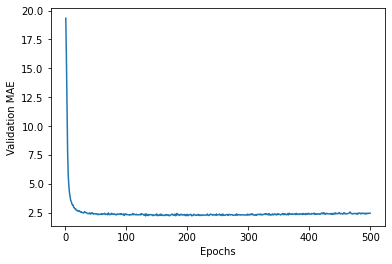

In [114]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

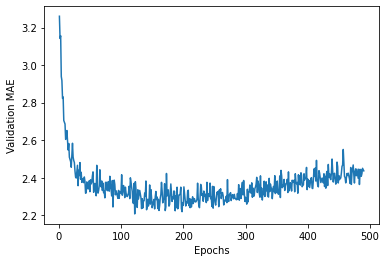

In [115]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

## Train the final model

In [117]:
model = build_model()
model.fit(
    train_data,
    train_targets,
    epochs=130,
    batch_size=16,
    verbose=0
)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.5082 - mae: 2.5650


In [118]:
test_mae_score

2.5650408267974854

In [119]:
predictions = model.predict(test_data)
predictions[0]

array([7.7298226], dtype=float32)